In [1]:
# import important packages
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%matplotlib inline
# ref :https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digitsf

(1797, 64)


<Figure size 432x288 with 0 Axes>

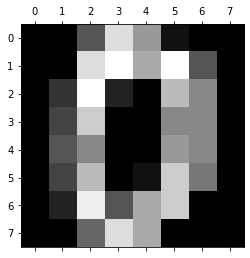

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
#(1797, 64)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()
# ref:: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#:~:text=To%20load%20the%20data%20and%20visualize%20the%20images%3A,plt%20%3E%3E%3E%20plt.gray%28%29%20%3E%3E%3E%20plt.matshow%28digits.images%29%20%3C...%3E%20%3E%3E%3E%20plt.show%28%29

In [3]:
from sklearn.metrics import accuracy_score
# load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# create and fit a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# make predictions on the test set
y_pred = gb.predict(X_test)

# evaluate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# ref:: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

Accuracy: 0.9600


In [4]:
# just to see the info
digits
# https://tsapps.nist.gov/publication/get_pdf.cfm?pub_id=900721

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# took help from to find the difference in early stopping time vs after stopping time from the web:
# https://docs.w3cub.com/scikit_learn/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html
from sklearn.datasets import load_digits
digits = load_digits()
data_list = [digits]
data_list = [(digits.data, digits.target) for d in data_list]

names = ['Digits Data']  # how do you get to know that we need the following parametres?

n_gb = []       
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

n_estimators = 500 #question: why they put 500?

for X, y in data_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=0)

    # We specify that if the scores don't improve by atleast 0.01 for the last
    # 10 stages, stop fitting additional stages
    gbes = GradientBoostingClassifier(n_estimators=n_estimators,
                                               validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01,
                                               random_state=0)
    gb = GradientBoostingClassifier(n_estimators=n_estimators,
                                             random_state=0)
    start = time.time()
    gb.fit(X_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    time_gbes.append(time.time() - start)

    score_gb.append(gb.score(X_test, y_test))
    score_gbes.append(gbes.score(X_test, y_test))

    n_gb.append(gb.n_estimators_)
    n_gbes.append(gbes.n_estimators_)

bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

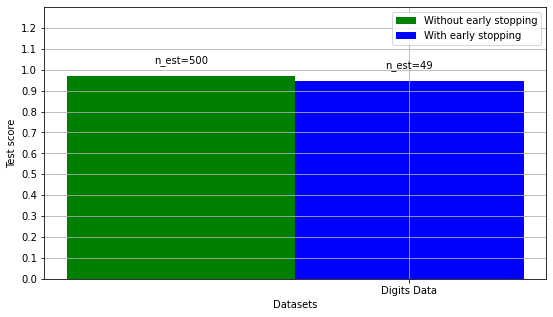

In [6]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index, score_gb, bar_width, label='Without early stopping',
               color='green')
bar2 = plt.bar(index + bar_width, score_gbes, bar_width,
               label='With early stopping', color='blue')

plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0, 1.3, 0.1))
def autolabel(rects, n_estimators):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.,
                 1.05 * rect.get_height(), 'n_est=%d' % n_estimators[i],
                 ha='center', va='bottom')


autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3])
plt.legend(loc='best')
plt.grid(True)

plt.xlabel('Datasets')
plt.ylabel('Test score')

plt.show()


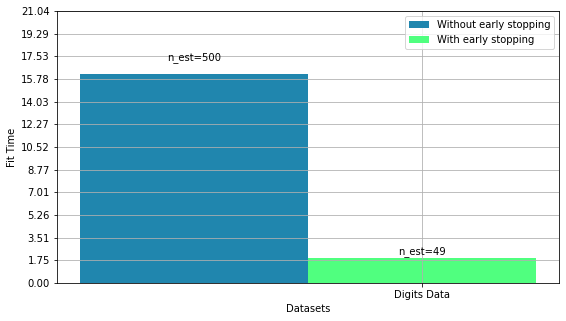

In [7]:
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index, time_gb, bar_width, label='Without early stopping',
               color='#2086AE')
bar2 = plt.bar(index + bar_width, time_gbes, bar_width,
               label='With early stopping', color='#50ff7f')

max_y = np.amax(np.maximum(time_gb, time_gbes))

plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3 * max_y])
plt.legend(loc='best')
plt.grid(True)

plt.xlabel('Datasets')
plt.ylabel('Fit Time')

plt.show()